In [1]:
# system imports
import os
import sys

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# signal processing
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

# misc
import warnings

In [2]:
sns.set(style="whitegrid", rc={"axes.facecolor": '#EFF2F7'})

settings = {}
settings["fs"] = 500

In [8]:
df = pd.read_csv("../../../../Downloads/ecg.csv",sep=";",index_col="ms")

In [9]:
df

,heartrate
ms,
0,504
2,504
4,504
6,504
8,506
...,...
299992,647
299994,624
299996,592


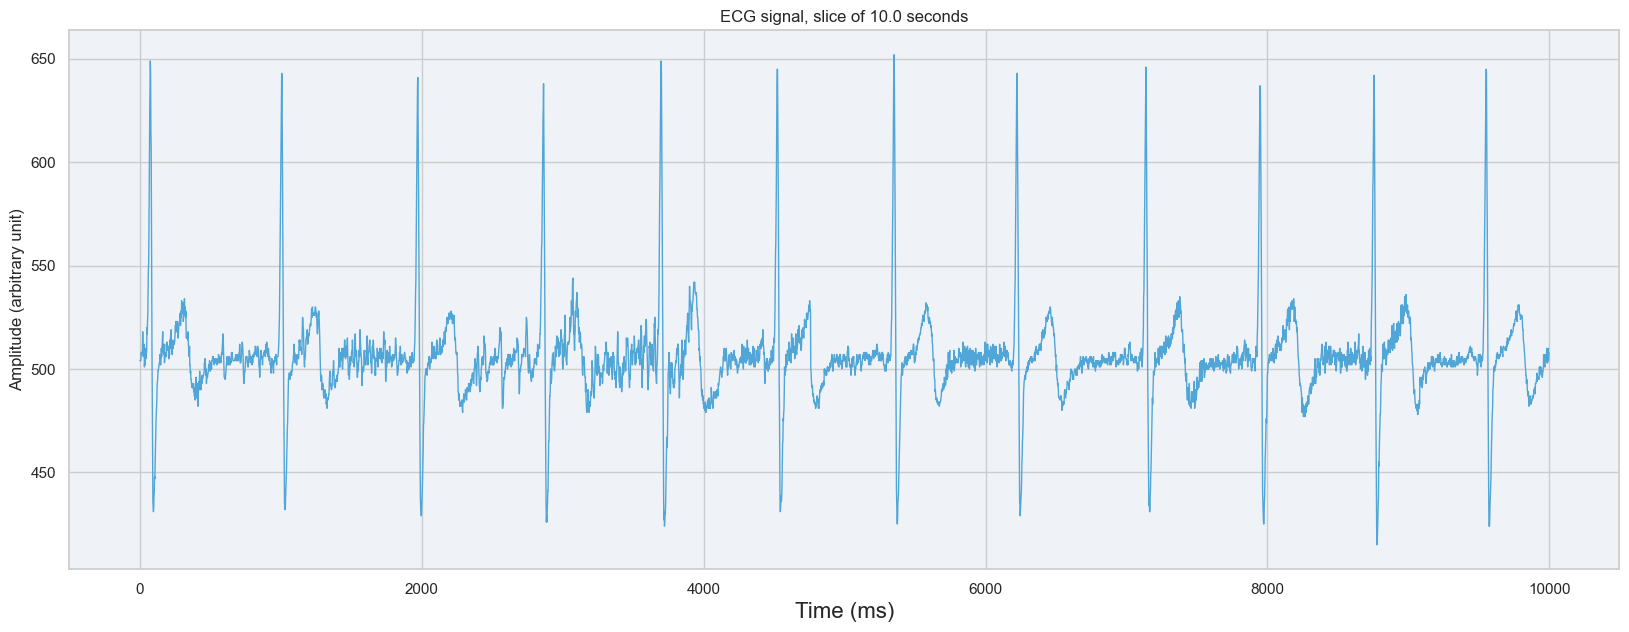

In [10]:
plt.figure(figsize=(20, 7))
start = 0
stop = 5000
duration = (stop-start) / settings['fs']
plt.title("ECG signal, slice of %.1f seconds" % duration)
plt.plot(df[start:stop].index, df[start:stop].heartrate, color="#51A6D8", linewidth=1)
plt.xlabel("Time (ms)", fontsize=16)
plt.ylabel("Amplitude (arbitrary unit)")
plt.show()

In [ ]:
def detect_peaks(ecg_signal, threshold=0.3, qrs_filter=None):
    if qrs_filter is None:
        t = np.linspace(-1, 1, 5)